In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math as mymath
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [222]:
from scipy import stats
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [223]:
file = "C:/Users/ppbin/OneDrive/Desktop/Ak Data Analytics23/Datascience/tip-amount.xlsx"
data= pd.read_excel(file)

In [224]:
data.head()

,Meal,Observed total bill(xi),Observed tip amount(yi)
0,1,34,5
1,2,108,17
2,3,64,11
3,4,88,8
4,5,99,14


In [225]:
data.columns

Index(['Meal', 'Observed total bill(xi)', 'Observed tip amount(yi)'], dtype='object')

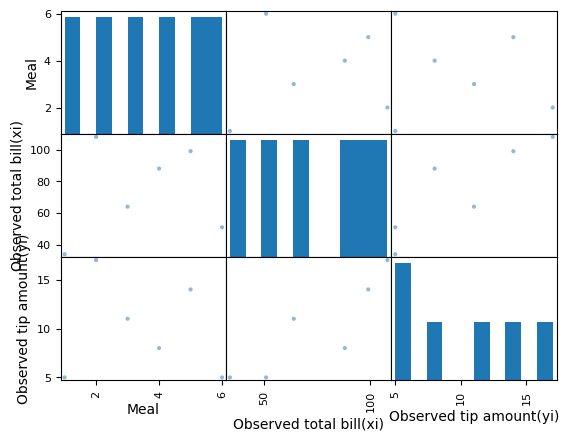

In [226]:
scatter_matrix(data)
plt.show()

In [227]:
corrmatrix= data.corr()

In [228]:
corrmatrix

,Meal,Observed total bill(xi),Observed tip amount(yi)
Meal,1.000000,0.151123,-0.130931
Observed total bill(xi),0.151123,1.000000,0.865665
Observed tip amount(yi),-0.130931,0.865665,1.000000


In [229]:
#training and testing is used if the model used is correct
#drop on X
X= data.drop(['Meal', 'Observed tip amount(yi)'], axis=1)
y= data['Observed tip amount(yi)']

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
#test_size is 0.2 and how we take should be equally random
#in this order on;u
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [232]:
#take model
from sklearn.linear_model import LinearRegression

In [233]:
lr= LinearRegression()

In [234]:
model= lr.fit(X_train, y_train)

In [235]:
pred= model.predict(X_test)

In [236]:
pred

array([ 4.31609993, 13.55968078])

In [237]:
y_test

0     5
1    17
Name: Observed tip amount(yi), dtype: int64

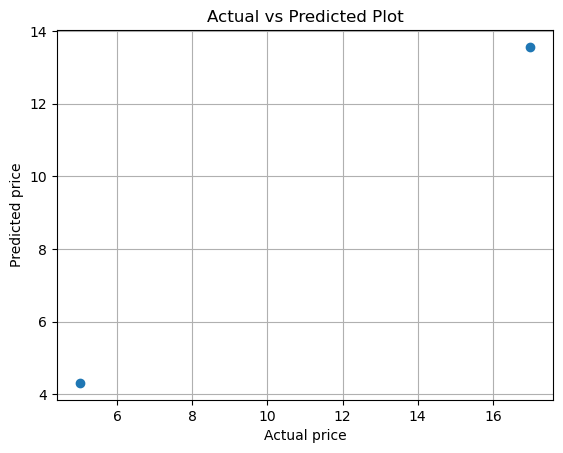

In [238]:
#Residual Analysis – Actual Vs Predicted Plot
plt.scatter(y_test, pred)
plt.title("Actual vs Predicted Plot")
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.grid()
plt.show()

In [239]:
from sklearn.metrics import mean_squared_error

In [240]:
print('MSE is: ', mean_squared_error(y_test, pred))

MSE is:  6.151757829712867


In [241]:
from sklearn.metrics import r2_score

In [242]:
print('R squared value is:', r2_score(y_test, pred))

R squared value is: 0.8291178380635315


In [243]:
# alternative method
mymodel = ols("y ~ X", data).fit()
mymodel

In [245]:
mymodel.summary()

C:\Users\ppbin\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     11.96
Date:                Wed, 24 May 2023   Prob (F-statistic):             0.0259
Time:                        21:43:42   Log-Likelihood:                -13.349
No. Observations:                   6   AIC:                             30.70
Df Residuals:                       4   BIC:                             30.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8203      3.323     -0.247      0.817     -10.046       8.406
X              0.1462      0.042      3.458      0.026       0.029       0.264
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.233
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.647
Skew:                          -0.694   Prob(JB):                        0.724
Kurtosis:                       2.187   Cond. No.                         233.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
#Wine quality data

In [247]:
file = "C:/Users/ppbin/OneDrive/Desktop/Ak Data Analytics23/Datascience/winequality-red.csv"
data= pd.read_csv(file)


In [248]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [249]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         931 non-null    float64
 1   volatile acidity      931 non-null    float64
 2   citric acid           931 non-null    float64
 3   residual sugar        931 non-null    float64
 4   chlorides             931 non-null    float64
 5   free sulfur dioxide   931 non-null    float64
 6   total sulfur dioxide  931 non-null    float64
 7   density               931 non-null    float64
 8   pH                    931 non-null    float64
 9   sulphates             931 non-null    float64
 10  alcohol               931 non-null    float64
 11  quality               931 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 94.6 KB


In [251]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [252]:
df.shape

(931, 12)

In [253]:
#handling outliers
j=1
for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']:
    Q1= np.percentile(df[i],25, interpolation='midpoint')
    Q2= np.percentile(df[i],50, interpolation='midpoint')
    Q3= np.percentile(df[i],75, interpolation='midpoint')
    if Q2== df[i].median():
        IQR= Q3-Q1
        low_lim= Q1-1.5*IQR
        up_lim= Q3+1.5*IQR
        outlier =[]
        for x in df[i]:
            if(x<low_lim)or (x>up_lim):
                outlier.append(x)
        ind2= df[i]>up_lim
        ind3= df[i]<low_lim
        indicestodrop2= df.loc[ind2].index
        indicestodrop3= df.loc[ind3].index
        df= df.drop(indicestodrop2)
        df= df.drop(indicestodrop3)
    else:
        print('check again')
df.shape

C:\Users\ppbin\AppData\Local\Temp\ipykernel_14940\1989834847.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1= np.percentile(df[i],25, interpolation='midpoint')
C:\Users\ppbin\AppData\Local\Temp\ipykernel_14940\1989834847.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2= np.percentile(df[i],50, interpolation='midpoint')
C:\Users\ppbin\AppData\Local\Temp\ipykernel_14940\1989834847.py:8: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoi

(928, 12)

In [254]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [255]:
corrmatrix= df.corr()

In [256]:
#make it colored and remove columns
corrmatrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.228955,0.590797,0.199161,0.144666,-0.155694,-0.066721,0.522449,-0.661057,0.163964,0.034287,0.112790
volatile acidity,-0.228955,1.000000,-0.654102,0.063854,0.118328,-0.022416,0.080494,0.120434,0.193588,-0.321440,-0.252615,-0.349133
citric acid,0.590797,-0.654102,1.000000,0.104107,0.016275,-0.056545,0.010001,0.189510,-0.398678,0.293848,0.206450,0.224740
residual sugar,0.199161,0.063854,0.104107,1.000000,0.251633,0.095760,0.191138,0.337309,-0.005284,0.058250,0.152502,0.049143
chlorides,0.144666,0.118328,0.016275,0.251633,1.000000,0.022960,0.203100,0.381679,-0.111090,-0.115135,-0.255493,-0.138642
free sulfur dioxide,-0.155694,-0.022416,-0.056545,0.095760,0.022960,1.000000,0.653752,0.003065,0.196705,0.105746,-0.023725,0.020651
total sulfur dioxide,-0.066721,0.080494,0.010001,0.191138,0.203100,0.653752,1.000000,0.221966,0.082208,-0.057726,-0.273778,-0.162543
density,0.522449,0.120434,0.189510,0.337309,0.381679,0.003065,0.221966,1.000000,-0.127470,0.059163,-0.564785,-0.221478
pH,-0.661057,0.193588,-0.398678,-0.005284,-0.111090,0.196705,0.082208,-0.127470,1.000000,0.016320,0.047321,-0.069194
sulphates,0.163964,-0.321440,0.293848,0.058250,-0.115135,0.105746,-0.057726,0.059163,0.016320,1.000000,0.278392,0.445390


In [257]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [258]:
X= df.drop(['quality'], axis=1)
y= df['quality']

In [259]:
X_test, X_train, y_test, y_train= train_test_split(X,y, test_size=0.25, random_state=42)

In [260]:
model= lr.fit(X_train, y_train)

In [261]:
prediction= model.predict(X_test)

In [262]:
#prediction of y_test
prediction

array([5.22391922, 6.11970402, 6.53296909, 5.39268821, 5.68446505,
       5.64787006, 5.57506006, 5.72103542, 6.03546166, 5.08580437,
       5.31955612, 5.12943832, 5.11491814, 5.32942728, 5.41913339,
       5.24609993, 5.5562081 , 5.3207654 , 5.28055782, 5.41945891,
       5.00776695, 5.82862118, 5.32942728, 5.04258803, 6.11528535,
       6.22799828, 5.02949879, 5.26475169, 6.15988966, 4.99637644,
       5.1887794 , 6.56079607, 5.36127243, 5.08174229, 5.07684419,
       5.77259404, 5.01675842, 5.32619714, 5.39607982, 5.7731938 ,
       5.43551367, 5.97097166, 6.31269444, 6.16183959, 4.99107486,
       6.66323446, 5.6796219 , 6.28133998, 6.1819129 , 6.10470161,
       5.68122367, 5.24545798, 5.59578631, 4.83931315, 5.31693456,
       5.53322959, 5.77921635, 6.09977945, 6.17942619, 5.30938555,
       5.5469644 , 5.05055086, 5.23290562, 6.03332931, 5.70820734,
       6.43061375, 6.29099419, 5.43519582, 4.93523558, 5.65051482,
       5.39090109, 5.87212038, 5.70066681, 5.46551157, 5.85124

In [263]:
#actual values of y test
y_test

590     5
1311    6
838     7
100     6
681     6
       ..
186     5
542     5
1506    6
857     7
180     5
Name: quality, Length: 696, dtype: int64

In [264]:
#now to test if it is a good model
print('MSE is: ', mean_squared_error(y_test, prediction))

MSE is:  0.3456870223560701


In [265]:
print('R squared value is:', r2_score(y_test, prediction))

R squared value is: 0.35340804368766277


In [266]:
#scaling
from sklearn.preprocessing import MinMaxScaler
min_max= MinMaxScaler(feature_range=(0,1))

#min_max for minmaxscaling
X1 = min_max.fit_transform(X)
X1 = pd.DataFrame(X,columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])
X.drop(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],axis=1,inplace=True)
X = pd.concat([X.reset_index(drop=True), X1.reset_index(drop=True)], axis=1)

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

print('MSE is: ', mean_squared_error(y_test, pred))
print('R squared value is: ', r2_score(y_test, pred))

MSE is:  0.3429722019806895
R squared value is:  0.32870284724825183


In [201]:
# Residual Analysis
res = y_test-pred
res

1450    0.743895
117     0.869630
1143   -0.041573
954     0.001121
1468    1.406101
          ...   
2      -0.449153
1459    0.285662
1306   -0.387934
1005    0.665281
5      -0.179752
Name: quality, Length: 187, dtype: float64

In [202]:
pred=pd.DataFrame(pred,columns=['Predicted'])
pred

,Predicted
0,6.256105
1,5.130370
2,6.041573
3,5.998879
4,5.593899
...,...
182,5.449153
183,6.714338
184,5.387934
185,6.334719


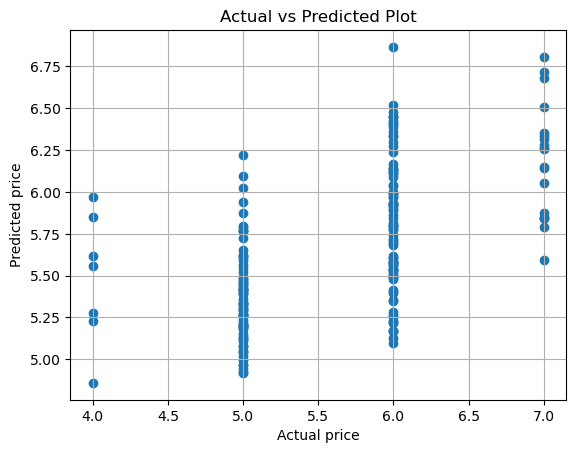

In [203]:
#Residual Analysis – Actual Vs Predicted Plot
plt.scatter(y_test, pred)
plt.title("Actual vs Predicted Plot")
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.grid()
plt.show()

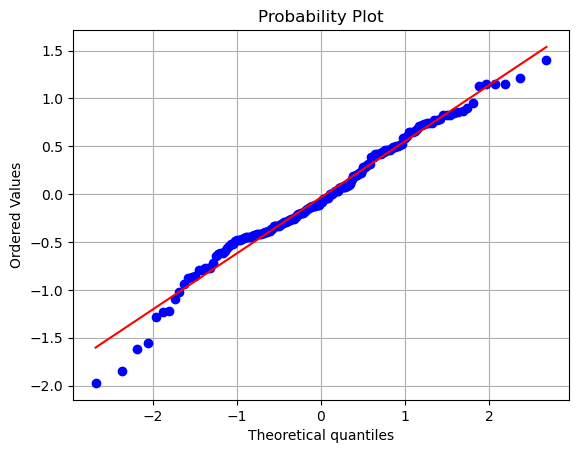

In [204]:
#Residual Analysis: Normality test
norm_test = stats.normaltest(res)
w = norm_test[0]
p_value = norm_test[1]
stats.probplot(res, plot= plt)
plt.grid()
plt.show()

In [207]:
df['quality'].nunique()

4

In [208]:
df['quality'].unique()

array([5, 6, 7, 4], dtype=int64)

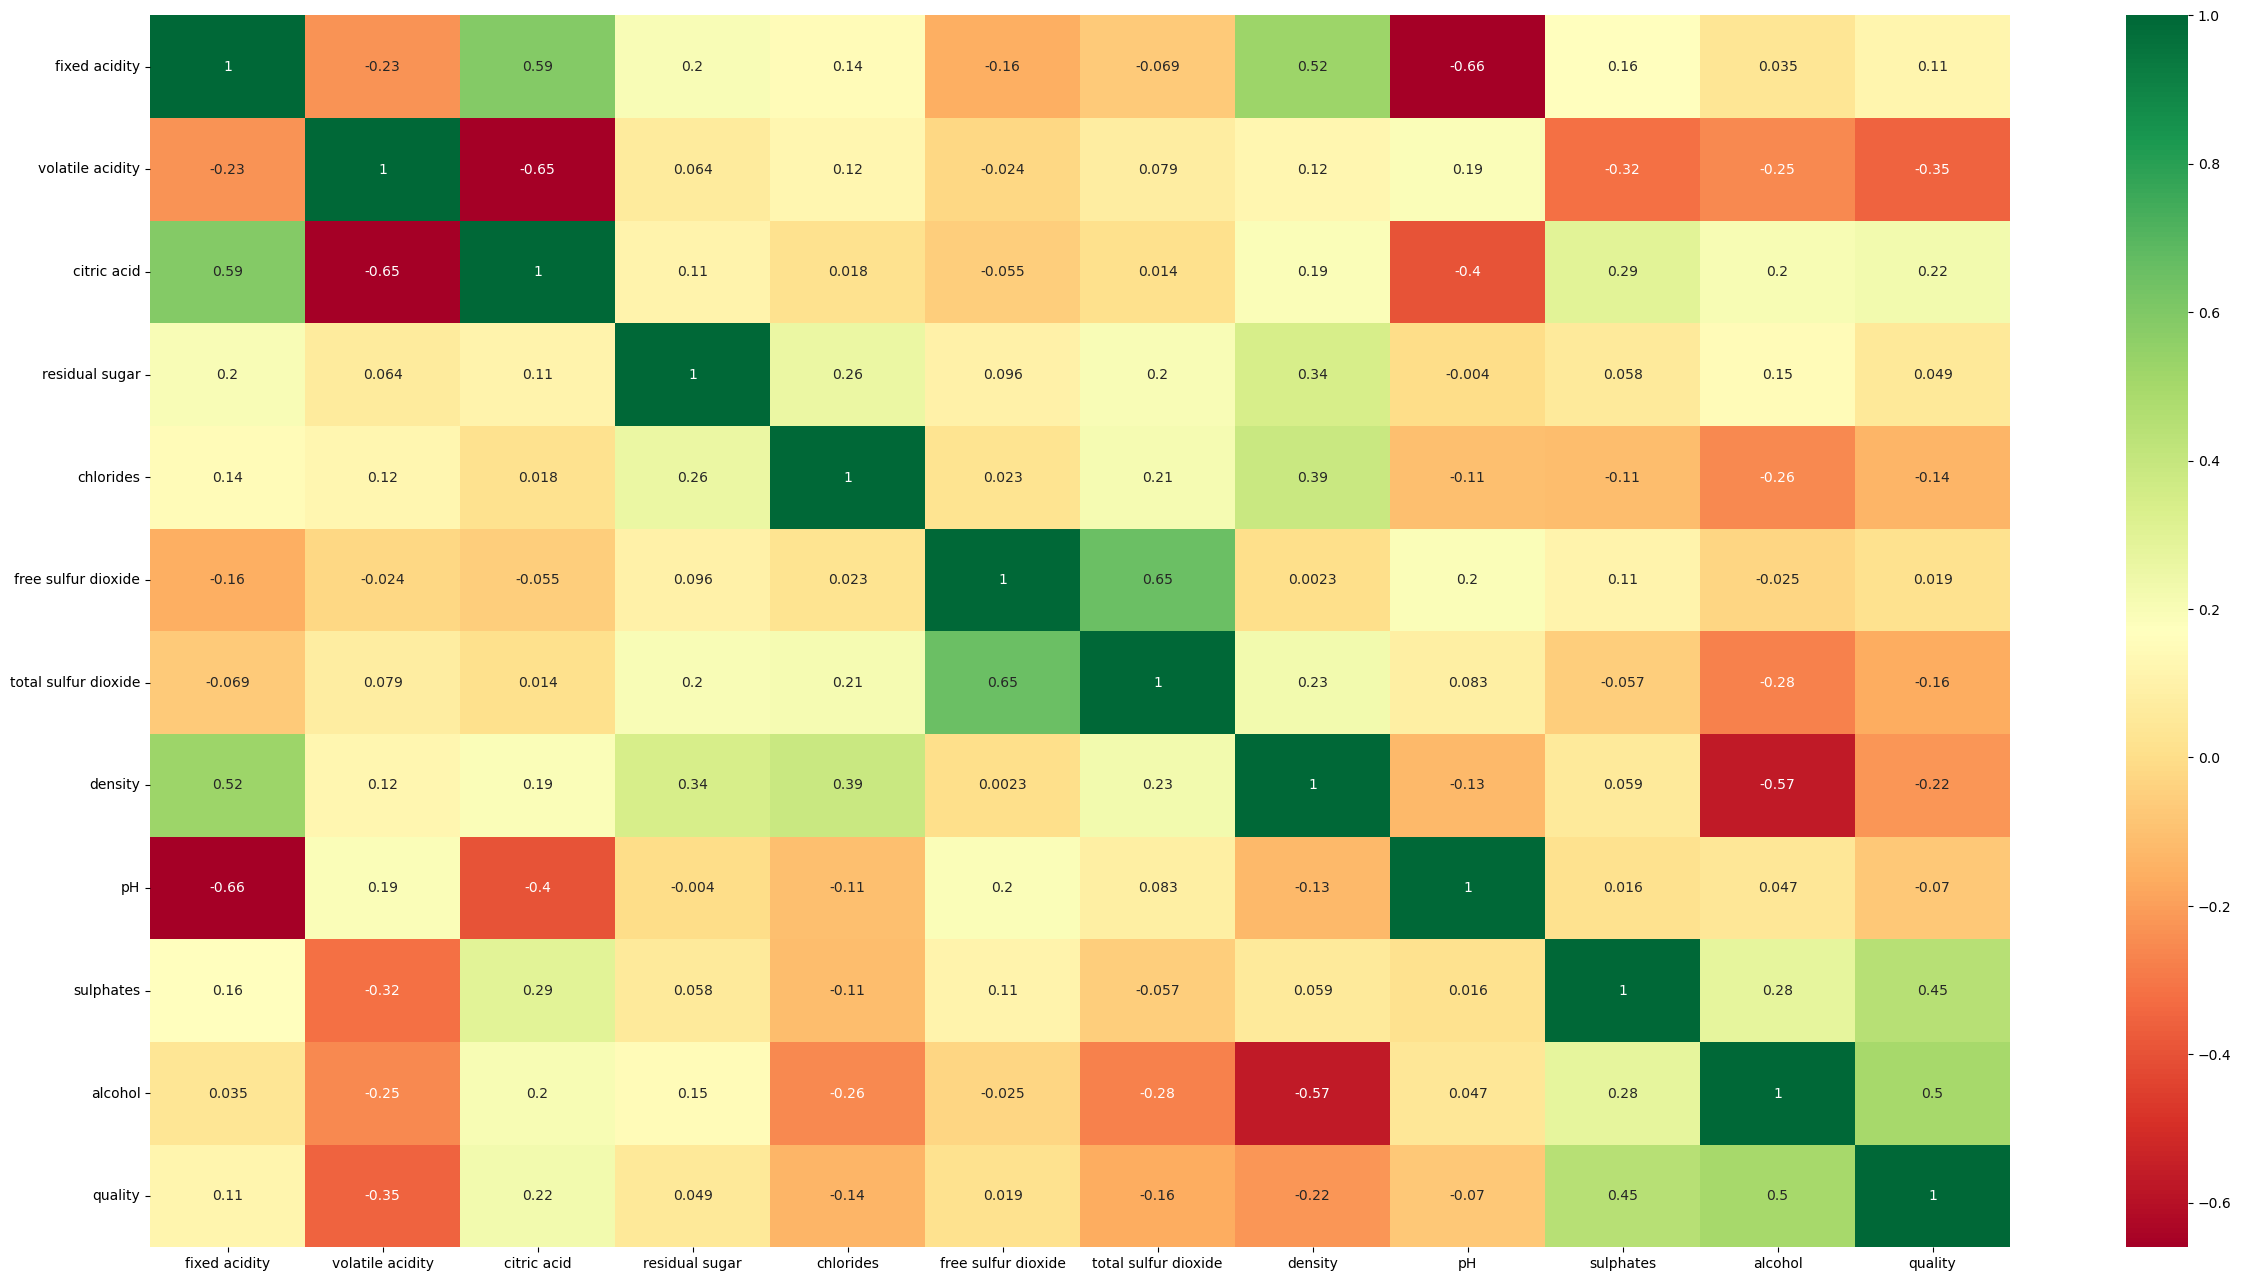

In [209]:
#Heat map
#vmin for color minimum
plt.subplots(figsize=(30,16))
sns.heatmap(df.corr(),annot=True, cmap="RdYlGn")
plt.show()

In [210]:
#density, fixed density, take the columns which has low correlation.
#the colors define where the corrleation is the highest
#check highly correlated columns, then drop columns which are low
#-ly correlated to quality.
#open image
#only few columns so just this
data1= df.drop(['fixed acidity', 'free sulfur dioxide'], axis=1)

In [211]:
y= data1['quality']
X= data1.drop('quality', axis=1)

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, 
                                                  random_state=42)

In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
#take as instance variable
lr= LinearRegression()

In [215]:
model= lr.fit(X_train, y_train)

In [216]:
prediction= model.predict(X_test)

In [217]:
from sklearn.metrics import mean_squared_error, r2_score

In [218]:
mean_squared_error(y_test, prediction)

0.34276490215418126

In [219]:
r2_score(y_test, prediction)

0.3291085937854267